## Imports

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import h5py
import pandas as pd
from SnapUtils import read_snapshot_info


ModuleNotFoundError: No module named 'SnapUtils'

## Read in file

In [2]:
dust_xy = "snapshot_150_O1_dust_rho_xy.fits"
with fits.open(dust_xy) as hdul:
    dust_density_xy = hdul[0].data
    header_xy = hdul[0].header

dust_xz = "snapshot_150_O1_dust_rho_xz.fits"
with fits.open(dust_xz) as hdul:
    dust_density_xz = hdul[0].data
    header_xz = hdul[0].header

dust_yz = "snapshot_150_O1_dust_rho_yz.fits"
with fits.open(dust_yz) as hdul:
    dust_density_yz = hdul[0].data
    header_yz = hdul[0].header

sed = "snapshot_150_O1_sed.dat"
with open(sed, 'r') as file:
    sed_content = file.read()
    print(sed_content)

# SED at inclination 90 deg, azimuth 0 deg, distance 1000 pc
# column 1: wavelength; lambda (micron)
# column 2: total flux; F_nu (Jy)
3.680044815e-01 1.027948719e-210
4.782264547e-01 1.240518864e-156
6.217817151e-01 7.965554200e-129
7.532275894e-01 1.647886438e-111
8.685060707e-01 9.857648954e-101
9.730059041e-01 2.425339830e-89



## Conversions

In [3]:
# going from msun/au^3 to g/cm^3
msun_to_g = u.Msun.to('g')
au_to_cm = u.AU.to('cm')
conv_factor = msun_to_g / (au_to_cm)**3
dust_density_cgs_xy = dust_density_xy * conv_factor
dust_density_cgs_xz = dust_density_xz * conv_factor
dust_density_cgs_yz = dust_density_yz * conv_factor

## Density Plot

/tmp/ipykernel_110/245342135.py:20: RuntimeWarning: divide by zero encountered in log10
  im = axes[0, i].imshow(np.log10(data), cmap='viridis', origin='lower')
/tmp/ipykernel_110/245342135.py:34: RuntimeWarning: divide by zero encountered in log10
  im = axes[1, i].imshow(np.log10(data), cmap='viridis', origin='lower')


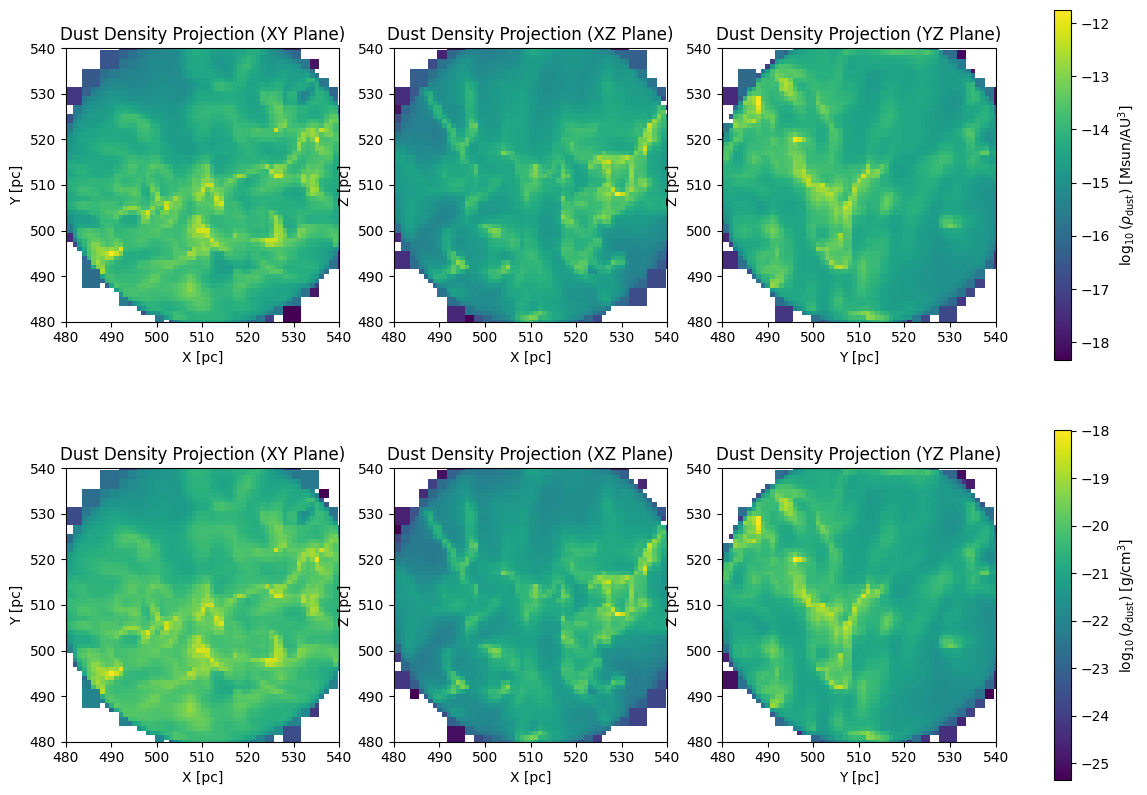

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# data
plot_data_row1 = [dust_density_xy, dust_density_xz, dust_density_yz]
plot_data_row2 = [dust_density_cgs_xy, dust_density_cgs_xz, dust_density_cgs_yz]

row_titles = [
    'Dust Density Projection (XY Plane)',
    'Dust Density Projection (XZ Plane)',
    'Dust Density Projection (YZ Plane)']

row1_xlabel = ['X [pc]', 'X [pc]', 'Y [pc]']
row1_ylabel = ['Y [pc]', 'Z [pc]', 'Z [pc]']
row2_xlabel = ['X [pc]', 'X [pc]', 'Y [pc]']
row2_ylabel = ['Y [pc]', 'Z [pc]', 'Z [pc]']

# row 1 plots
images_row1 = []
for i, data in enumerate(plot_data_row1):
    im = axes[0, i].imshow(np.log10(data), cmap='viridis', origin='lower')
    images_row1.append(im)
    axes[0, i].set_xlabel(row1_xlabel[i])
    axes[0, i].set_ylabel(row1_ylabel[i])
    axes[0, i].set_title(row_titles[i])
    axes[0, i].set_xlim(480, 540)
    axes[0, i].set_ylim(480, 540)

# single color bar for the first row
fig.colorbar(images_row1[0], ax=axes[0, :].ravel().tolist(), label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')

# row 2 plots
images_row2 = []
for i, data in enumerate(plot_data_row2):
    im = axes[1, i].imshow(np.log10(data), cmap='viridis', origin='lower')
    images_row2.append(im)
    axes[1, i].set_xlabel(row2_xlabel[i])
    axes[1, i].set_ylabel(row2_ylabel[i])
    axes[1, i].set_title(row_titles[i])
    axes[1, i].set_xlim(480, 540)
    axes[1, i].set_ylim(480, 540)

# single color bar for the second row
fig.colorbar(images_row2[0], ax=axes[1, :].ravel().tolist(), label=r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')

#plt.tight_layout()
plt.savefig('dust_density_dual_units_log.png', dpi=300)
plt.show()

## SED Plot

From snapshot_150_01_sed.dat. The file contains wavelength and flux data. Want to plot this to show the overall energy output of the simulated system across different wavelengths. This should verify the radiative transfer from SKIRT.

In [3]:
sed = "snapshot_150_O1_sed.dat"
with open(sed, 'r') as file:
    sed_content = file.read()
    print(sed_content)

# SED at inclination 90 deg, azimuth 0 deg, distance 1000 pc
# column 1: wavelength; lambda (micron)
# column 2: total flux; F_nu (Jy)
3.680044815e-01 1.027948719e-210
4.782264547e-01 1.240518864e-156
6.217817151e-01 7.965554200e-129
7.532275894e-01 1.647886438e-111
8.685060707e-01 9.857648954e-101
9.730059041e-01 2.425339830e-89



Text(0.5, 1.0, 'Spectral Energy Distribution (loglog)')

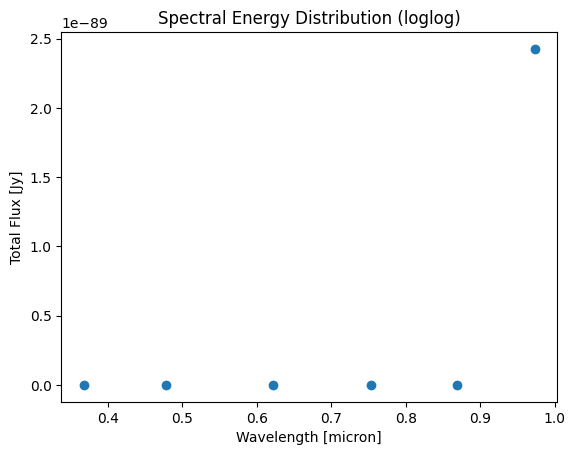

In [6]:
x_data = np.loadtxt(sed)[:,0]
y_data = np.loadtxt(sed)[:,1]
plt.scatter(x_data, y_data)
plt.semilogy
plt.xlabel('Wavelength [micron]')
plt.ylabel('Total Flux [Jy]')
plt.title('Spectral Energy Distribution (loglog)')

## Histogram

In [15]:
flat_density = dust_density.flatten()
flat_dust = flat_density[flat_density > 0]
flat_dust_cgs = flat_dust * conv_factor

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# msun/au^3
axes[0].hist(np.log10(flat_dust), bins=50)
axes[0].set_xlabel(r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')
axes[0].set_ylabel('Count')
axes[0].set_title('Dust Density (Log Scale)')
axes[0].grid()

# g/cm^3
axes[1].hist(np.log10(flat_dust_cgs), bins=50)
axes[1].set_xlabel(r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')
axes[1].set_ylabel('Count')
axes[1].set_title('Dust Density (Log Scale)')
axes[1].grid()

plt.tight_layout()
plt.savefig('dust_density_histogram_dual_units_log.png', dpi=300)
plt.show()

NameError: name 'dust_density' is not defined

## Overplotting stars on dust density plots

/tmp/ipykernel_110/647461401.py:79: RuntimeWarning: divide by zero encountered in log10
  im = axes[0, i].imshow(np.log10(data), cmap='viridis', origin='lower', extent=current_extent)
/tmp/ipykernel_110/647461401.py:114: RuntimeWarning: divide by zero encountered in log10
  im = axes[1, i].imshow(np.log10(data), cmap='viridis', origin='lower', extent=current_extent)


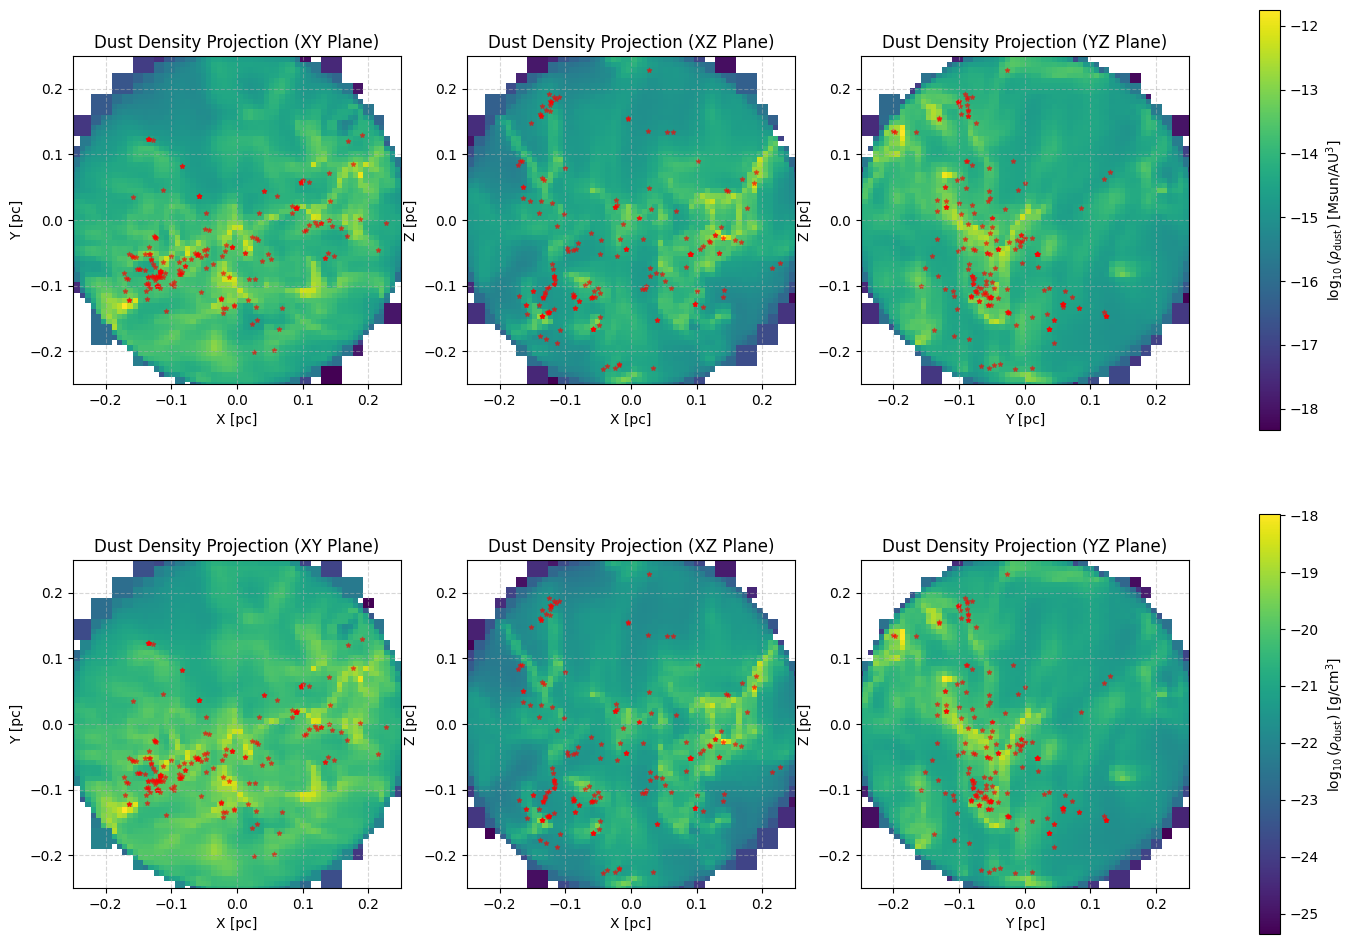

In [23]:
src_file = "snapshot_150_src.txt"
src_data = np.loadtxt(src_file)

star_x = src_data[:, 0]
star_y = src_data[:, 1]
star_z = src_data[:, 2]

snapshot_file = 'snapshot_150.hdf5'
temp_snap_head, _, _ = read_snapshot_info(snapshot_file)
snap_head_for_plot = temp_snap_head

boxsize = snap_head_for_plot.get('BoxSize (pc)', 1.0)
center = snap_head_for_plot.get('Center (pc)', np.zeros(3))
extraction_radius = snap_head_for_plot.get('Extraction Radius (pc)', 0.25)

# centering coordinates
star_x_centered = star_x - center[0]
star_y_centered = star_y - center[1]
star_z_centered = star_z - center[2]

# filter with extraction radius
star_coords_centered_all_dims = np.column_stack([star_x_centered, star_y_centered, star_z_centered])
r_dist_stars = np.linalg.norm(star_coords_centered_all_dims, axis=1)
r_cut_stars = r_dist_stars < extraction_radius_pc

star_x_filtered = star_x_centered[r_cut_stars]
star_y_filtered = star_y_centered[r_cut_stars]
star_z_filtered = star_z_centered[r_cut_stars]

# -box_size_pc/2 to +box_size_pc/2 relative to its center
x_plot_lim = box_size_pc / 2.0
y_plot_lim = box_size_pc / 2.0
z_plot_lim = box_size_pc / 2.0

#plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# data
plot_data_row1 = [dust_density_xy, dust_density_xz, dust_density_yz]
plot_data_row2 = [dust_density_cgs_xy, dust_density_cgs_xz, dust_density_cgs_yz]

# titles
col_titles = [
    'Dust Density Projection (XY Plane)',
    'Dust Density Projection (XZ Plane)',
    'Dust Density Projection (YZ Plane)'
]

# row 1 labels
row1_xlabels = ['X [pc]', 'X [pc]', 'Y [pc]']
row1_ylabels = ['Y [pc]', 'Z [pc]', 'Z [pc]']

# row 2 labels
row2_xlabels = ['X [pc]', 'X [pc]', 'Y [pc]']
row2_ylabels = ['Y [pc]', 'Z [pc]', 'Z [pc]']

# limits
plot_min_limit = -extraction_radius_pc
plot_max_limit = extraction_radius_pc


# row 1 plots (Msun/AU^3)
images_row1 = []
for i, data in enumerate(plot_data_row1):
    if i == 0: # XY 
        current_extent = [-x_plot_lim, x_plot_lim, -y_plot_lim, y_plot_lim]
        scatter_x = star_x_plot_filtered
        scatter_y = star_y_plot_filtered
    elif i == 1: # XZ 
        current_extent = [-x_plot_lim, x_plot_lim, -z_plot_lim, z_plot_lim]
        scatter_x = star_x_plot_filtered
        scatter_y = star_z_plot_filtered
    else: # YZ 
        current_extent = [-y_plot_lim, y_plot_lim, -z_plot_lim, z_plot_lim]
        scatter_x = star_y_plot_filtered 
        scatter_y = star_z_plot_filtered

    # dust density projection
    im = axes[0, i].imshow(np.log10(data), cmap='viridis', origin='lower', extent=current_extent)
    images_row1.append(im)

    # overplotting filtered and centered stars
    axes[0, i].scatter(scatter_x, scatter_y, s=10, color='red', marker='*', label='Stars', alpha=0.5)

    axes[0, i].set_xlabel(row1_xlabels[i])
    axes[0, i].set_ylabel(row1_ylabels[i])
    axes[0, i].set_title(col_titles[i])

    axes[0, i].set_xlim(plot_min_limit, plot_max_limit)
    axes[0, i].set_ylim(plot_min_limit, plot_max_limit)
    axes[0, i].grid(True, linestyle='--', alpha=0.5)

# color bar for the first row
fig.colorbar(images_row1[0], ax=axes[0, :].ravel().tolist(), label=r'$\log_{10}(\rho_{\rm dust})$ [Msun/AU$^3$]')


# row 2 plots (g/cm^3)
images_row2 = []
for i, data in enumerate(plot_data_row2):
    if i == 0: # XY 
        current_extent = [-x_plot_lim, x_plot_lim, -y_plot_lim, y_plot_lim]
        scatter_x = star_x_plot_filtered
        scatter_y = star_y_plot_filtered
    elif i == 1: # XZ 
        current_extent = [-x_plot_lim, x_plot_lim, -z_plot_lim, z_plot_lim]
        scatter_x = star_x_plot_filtered
        scatter_y = star_z_plot_filtered
    else: # YZ 
        current_extent = [-y_plot_lim, y_plot_lim, -z_plot_lim, z_plot_lim]
        scatter_x = star_y_plot_filtered
        scatter_y = star_z_plot_filtered

    # dust density projection
    im = axes[1, i].imshow(np.log10(data), cmap='viridis', origin='lower', extent=current_extent)
    images_row2.append(im)

    # overplotting filtered and centered stars
    axes[1, i].scatter(scatter_x, scatter_y, s=10, color='red', marker='*', label='Stars', alpha=0.5)

    axes[1, i].set_xlabel(row2_xlabels[i])
    axes[1, i].set_ylabel(row2_ylabels[i])
    axes[1, i].set_title(col_titles[i]) 

    axes[1, i].set_xlim(plot_min_limit, plot_max_limit)
    axes[1, i].set_ylim(plot_min_limit, plot_max_limit)
    axes[1, i].grid(True, linestyle='--', alpha=0.5) 


# color bar for the second row
fig.colorbar(images_row2[0], ax=axes[1, :].ravel().tolist(), label=r'$\log_{10}(\rho_{\rm dust})$ [g/cm$^3$]')

plt.savefig('dust_density_with_stars.png', dpi=300)
plt.show()

## Temperature Peaks - Gas Temperature Map

/tmp/ipykernel_102/2046298290.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='inferno')


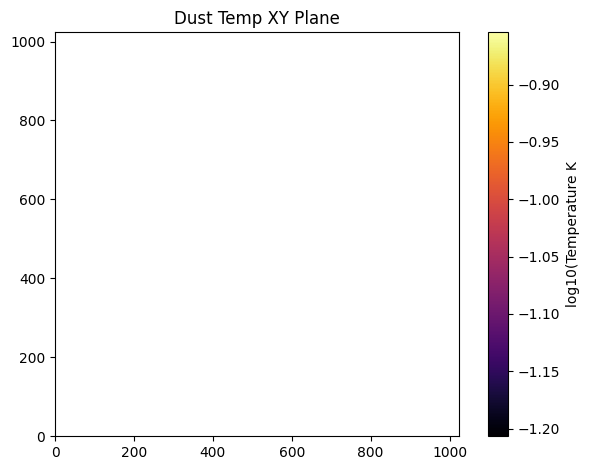

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1024 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                    1 / Array value scale                              
BZERO   =                    0 / Array value offset                             
DATE    = '2025-06-17T14:08:31' / Date and time of creation (UTC)               
ORIGIN  = 'SKIRT simulation'   / Astronomical Observatory, Ghent University     
BUNIT   = 'K       '        

In [18]:
with fits.open("snapshot_150_temp_dust_T_xy.fits") as hdul:
    data = hdul[0].data
    header = hdul[0].header
    
plt.imshow(np.log10(data), origin='lower', cmap='inferno')
plt.colorbar(label='log10(Temperature K')
plt.title('Dust Temp XY Plane')

plt.tight_layout()
plt.show()

print(header.tostring(sep='\n', padding=60))

##  Radial Energy Density Profile / Stars Colored by Mass

In [19]:
with fits.open("snapshot_150_O1_total.fits") as hdul:
    data = hdul[0].data
    header = hdul[0].header
    

print(header.tostring(sep='\n', padding=60))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  800 / length of data axis 1                          
NAXIS2  =                  800 / length of data axis 2                          
NAXIS3  =                    6 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                    1 / Array value scale                              
BZERO   =                    0 / Array value offset                             
DATE    = '2025-06-24T15:16:03' / Date and time of creation (UTC)               
ORIGIN  = 'SKIRT simulation'

## Massive vs Low Mass Stars